In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os

import analysis

In [2]:
# cfgbase = 'cl3_16_48_b6p1_m0p2450'
# job_num = 11705
# job_num = 12586
cfgbase = 'cl21_32_96_b6p1_m0p2800_m0p2450_mn3-ec'
job_num = 12652
base = './output/' + cfgbase + '_' + str(job_num)

C = analysis.read_h5(base, mom = True)    # C should be a dictionary whose keys are the momentum slices.

In [3]:
# print(C[0].shape)
# plt.figure()
# plt.plot(np.log(np.real(C[0][0, :])), 'b')
# plt.plot(np.log(np.real(C[2][0, :])), 'y')
# plt.plot(np.log(np.real(C[3][0, :])), 'r')
# plt.plot(np.log(np.real(C[4][0, :])), 'p')
# plt.plot(np.log(np.real(C[5][0, :])), 'g')
# plt.show()

<IPython.core.display.Javascript object>


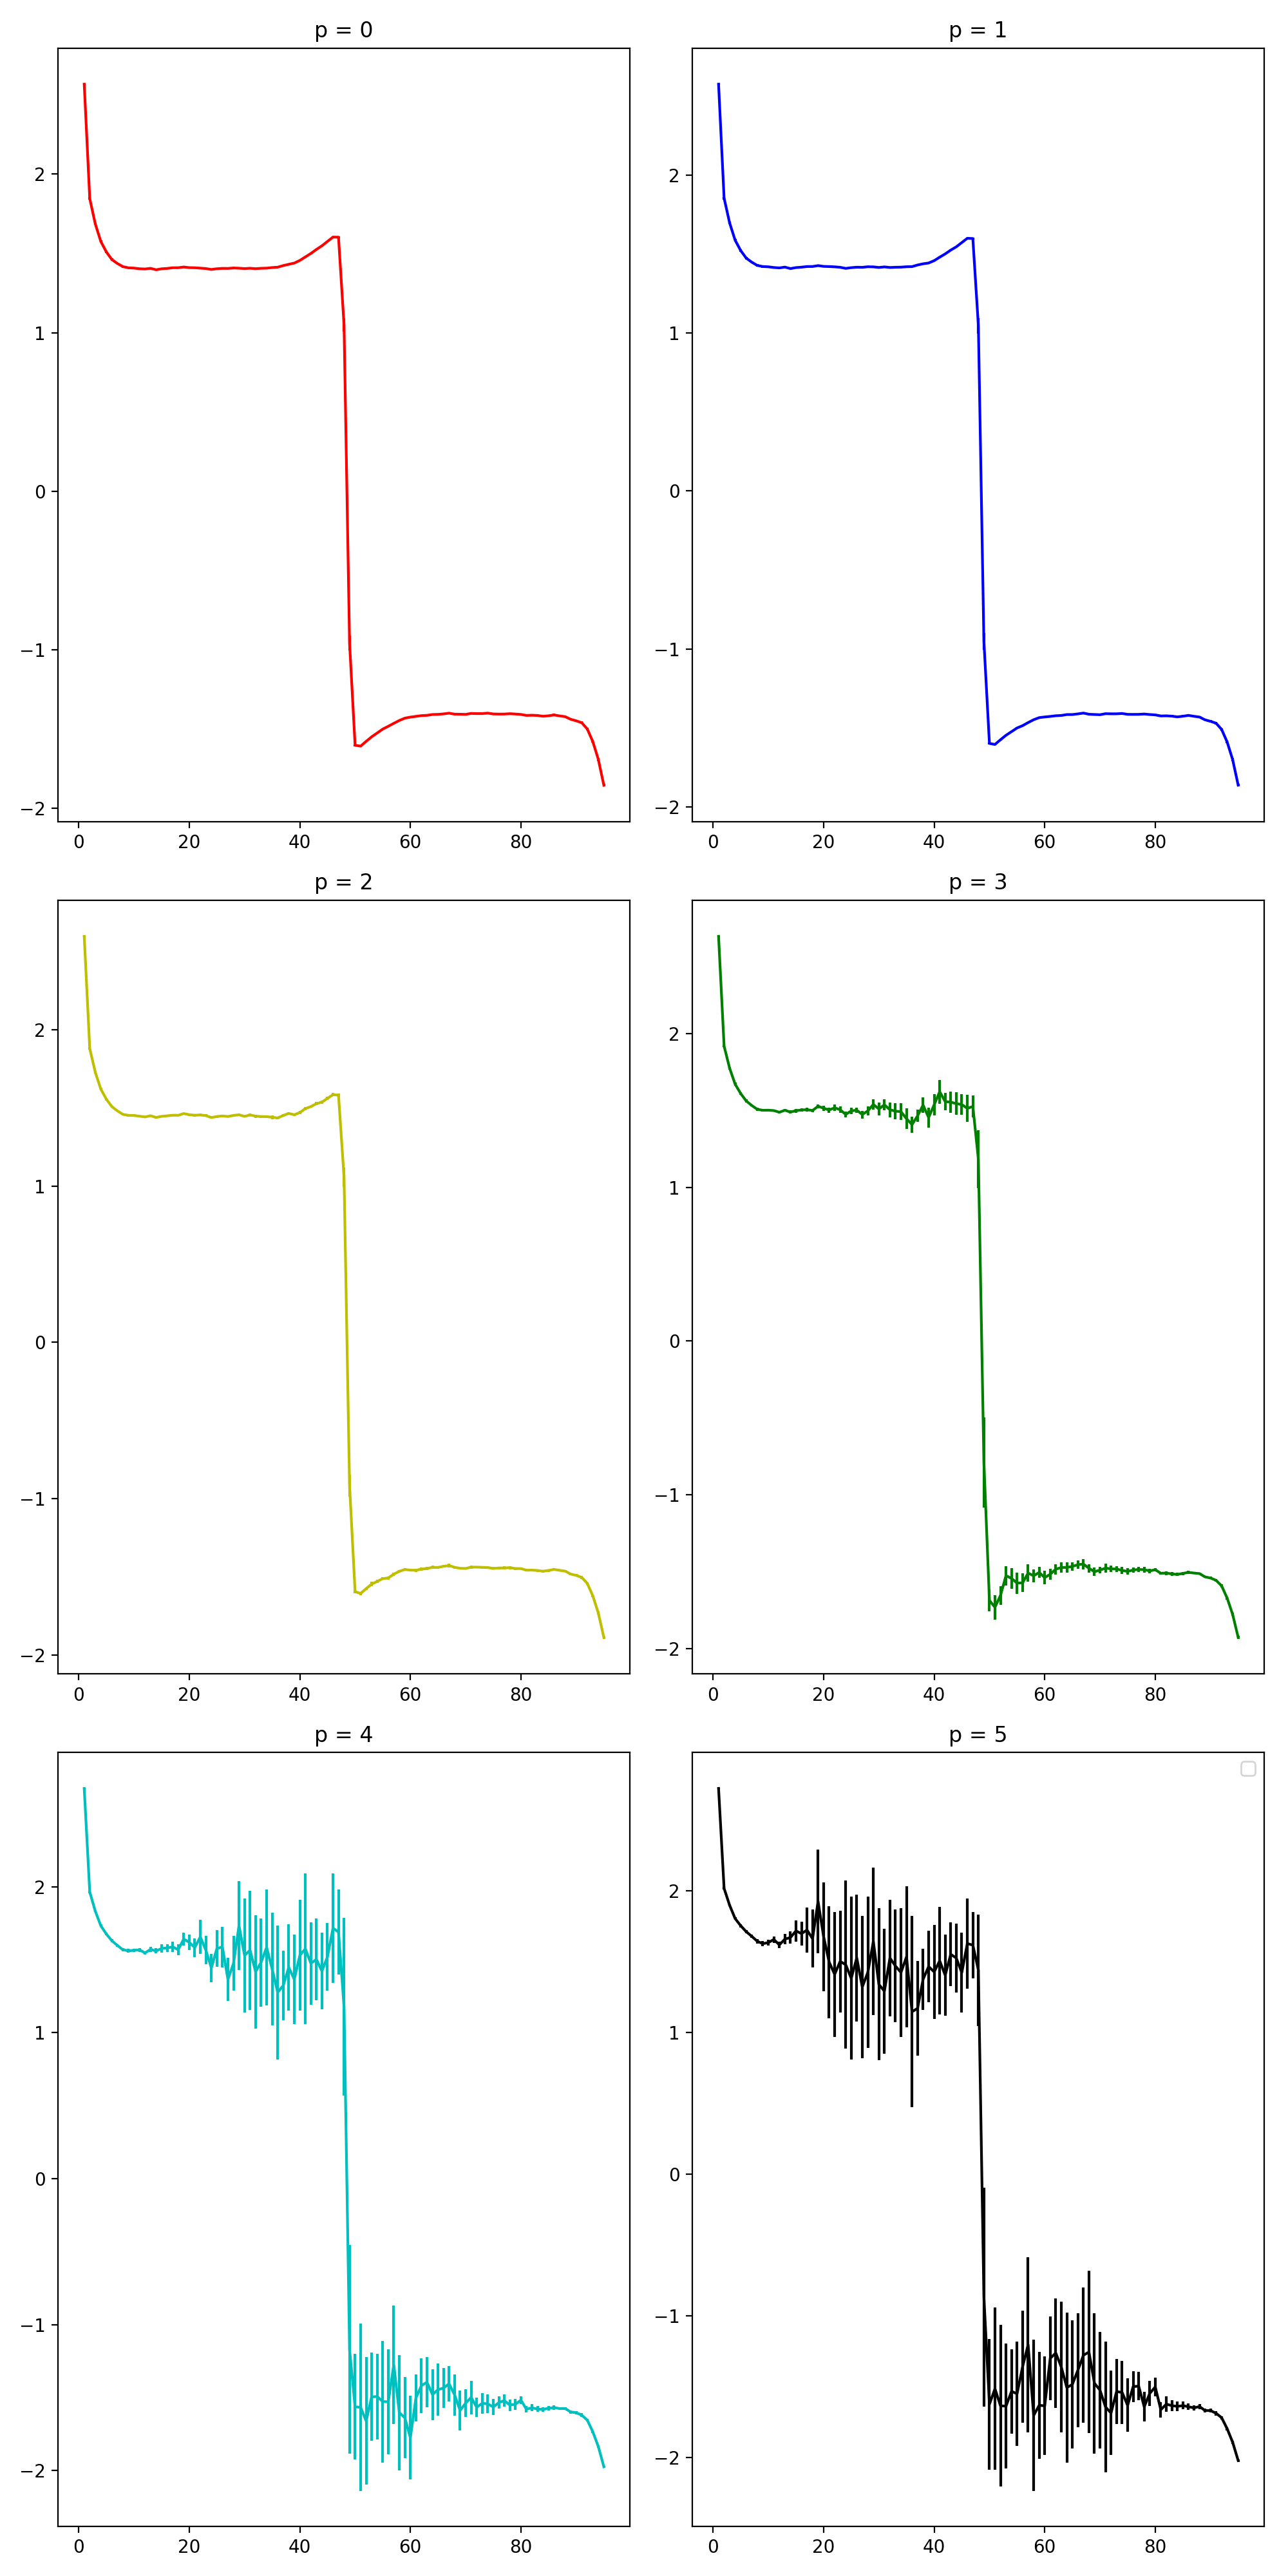

Computing for momentum = 0
Computing for momentum = 1
Computing for momentum = 2
Computing for momentum = 3
Computing for momentum = 4
Computing for momentum = 5


No handles with labels found to put in legend.


In [18]:
num_subplots = (3, 2)
colors = ['r', 'b', 'y', 'g', 'c', 'k']
f, ax = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 20))
ax = ax.flatten()
idx = 0
p_lat = np.sort([x for x in C.keys()])
energies = []
σ_energies = []
plotted_energies = []
plotted_err = []
corrs = {}
for p in p_lat:
    correlator = C[p]
    corrs[p] = np.mean(correlator, axis = 0)
    print('Computing for momentum = ' + str(p))
    num_configs = correlator.shape[0]
    n_t = correlator.shape[1]
    samples = analysis.bootstrap(correlator)
    ensemble_avg = np.mean(samples, axis = 1)
    #ensemble_avg = correlator    #unbootstrapped
    μ_m_eff, σ_m_eff = analysis.get_effective_mass(ensemble_avg)
    μ_cosh, σ_cosh = analysis.get_cosh_effective_mass(ensemble_avg)
    
    # Use μ_cosh or μ_m_eff
    to_analyze = μ_m_eff
    σ_analyze = σ_m_eff
    
    fit_region = range(15, 35)
    flipped = analysis.flip_half_data(to_analyze, n_t)
    E, σ_E = analysis.extract_mass(fit_region, flipped, σ_analyze)
    energies.append(E)
    σ_energies.append(σ_E)
    
    #Plot each curve
    ax[idx].errorbar(range(1, n_t), μ_m_eff, yerr = σ_m_eff, c = colors[p])
    #TODO: Is there a better way to compute the cosh corrected m_eff than to use a solver?
    #ax[idx].errorbar(range(1, n_t), μ_cosh, yerr = σ_cosh, c = 'r')
    plotted_energies.append(to_analyze)
    plotted_err.append(σ_analyze)
    ax[idx].set_title('p = ' + str(p))
    idx = idx + 1
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


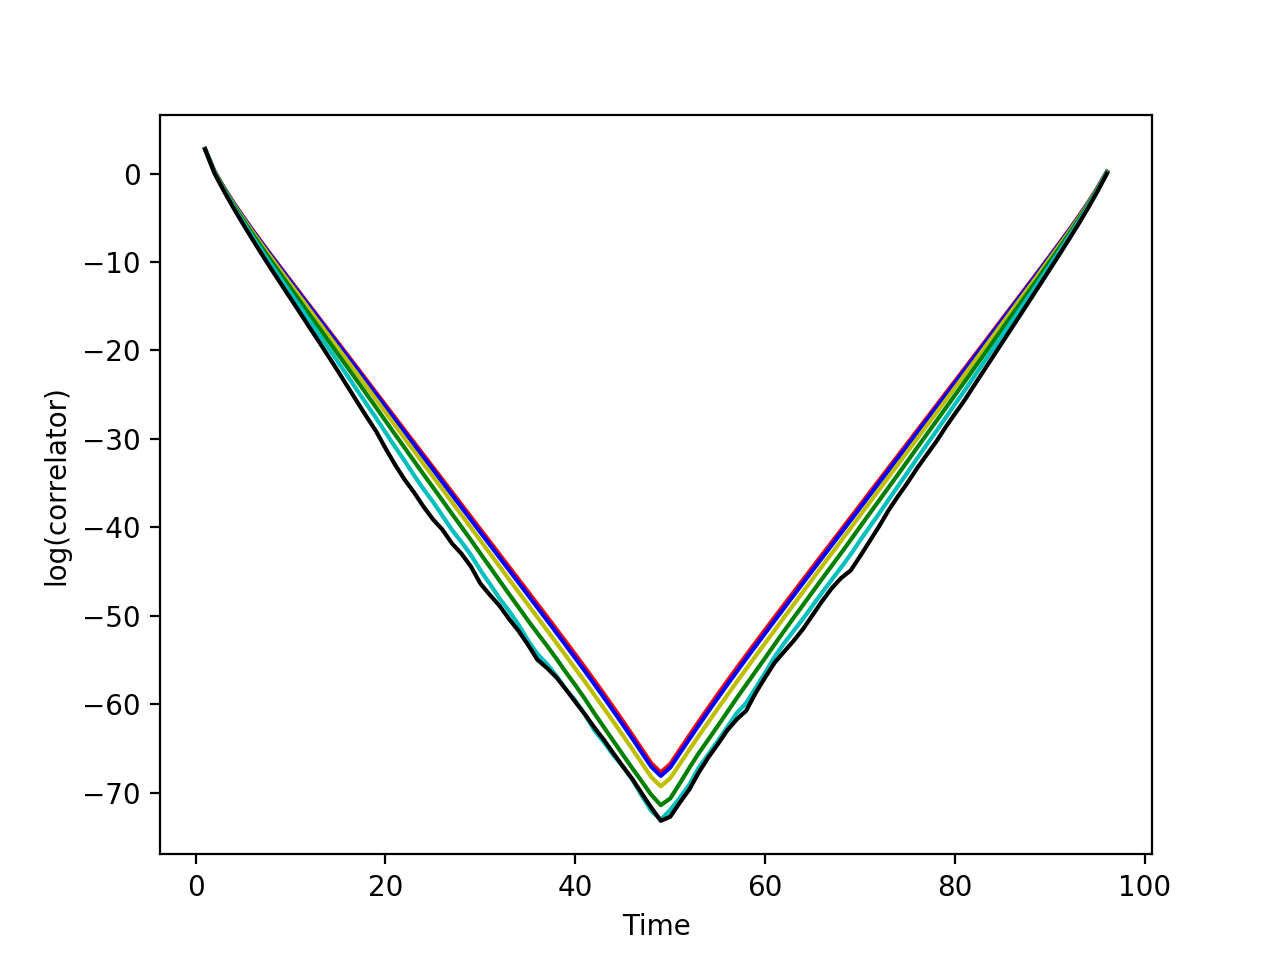

In [17]:
plt.figure()
for p in corrs:
    plt.plot(range(1, n_t + 1), np.log(corrs[p]), c = colors[p])
plt.xlabel('Time')
plt.ylabel('log(correlator)')
plt.show()

In [30]:
print('Lattice units:')
print(energies)
print(σ_energies)

a = .1167    # lattice spacing = a femtometers
conversion = .197327   # in GeV
print('\na = ' + str(a) + ' femtometers. \nhbar c = ' + str(conversion) + ' Gev times fm\n')

energies_unit = (np.array(energies) / a) * conversion
σ_energies_unit = (np.array(σ_energies) / a) * conversion
print('Physical units:')
print(energies_unit)
print(σ_energies_unit)

Lattice units:
[1.4070408666943814, 1.4176003273480229, 1.4493850164578919, 1.501732774369188, 1.5504662533894014, 1.5209114365091774]
[0.004044637207444582, 0.004473976865755535, 0.007135874676334331, 0.019629214067066768, 0.08662517347487068, 0.20759470230719249]

a = 0.1167 femtometers. 
hbar c = 0.197327 Gev times fm

Physical units:
[2.37915298 2.39700788 2.45075233 2.53926669 2.6216697  2.57169572]
[0.00683904 0.00756501 0.01206599 0.03319086 0.14647374 0.35102005]


<IPython.core.display.Javascript object>


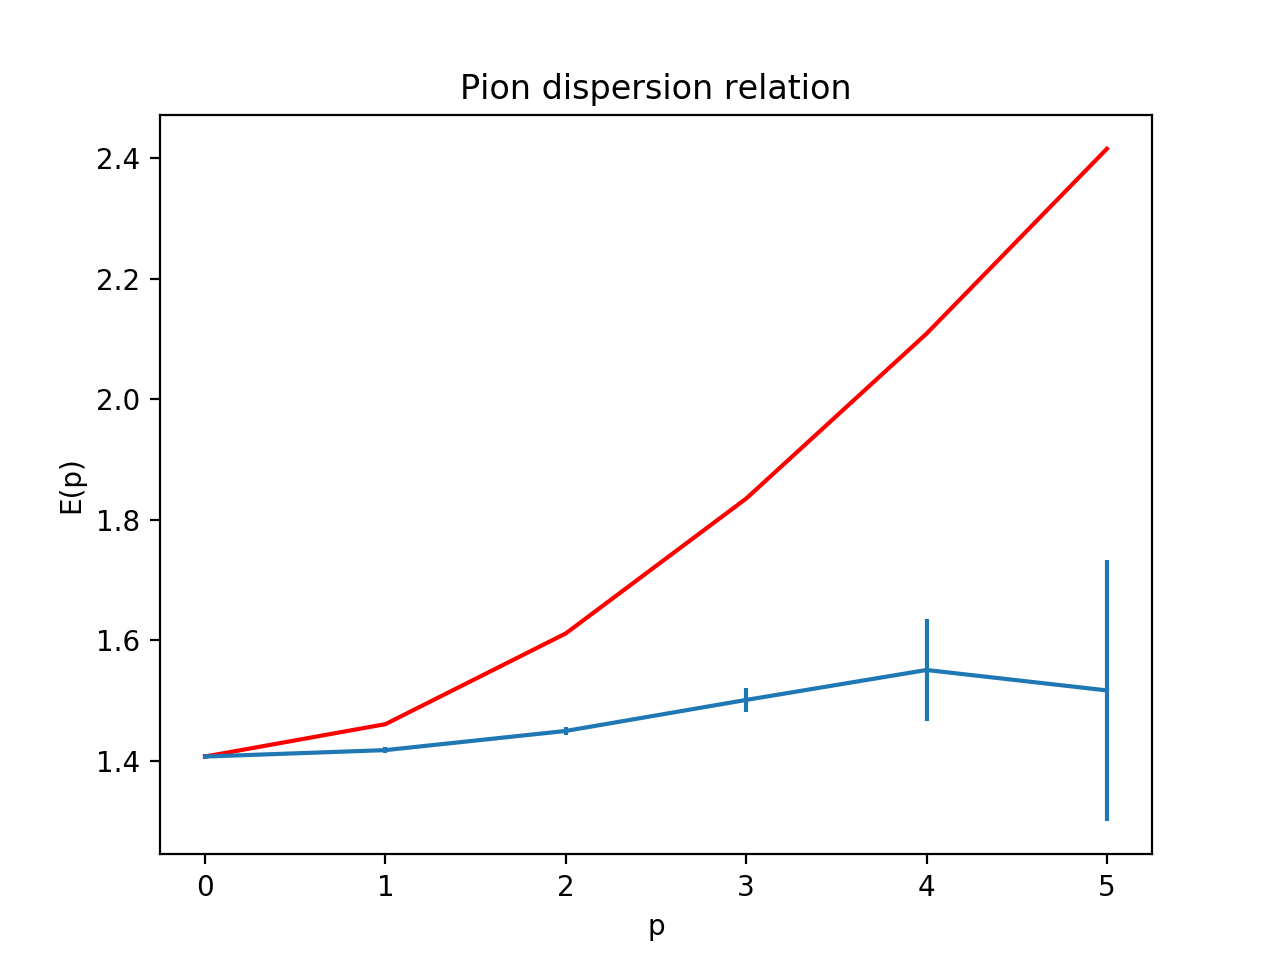

In [7]:
plt.figure()
plt.errorbar(p_lat, energies, σ_energies)
squared = np.multiply(p_lat, p_lat)
# M = (energies[0] / a) * conversion     # in GeV
M = energies[0]
curve = np.sqrt(M ** 2 + ((2*np.pi / 16) **2) * squared)
plt.plot(p_lat, curve, 'r')
plt.title('Pion dispersion relation')
plt.ylabel('E(p)')
plt.xlabel('p')
plt.show()

<IPython.core.display.Javascript object>


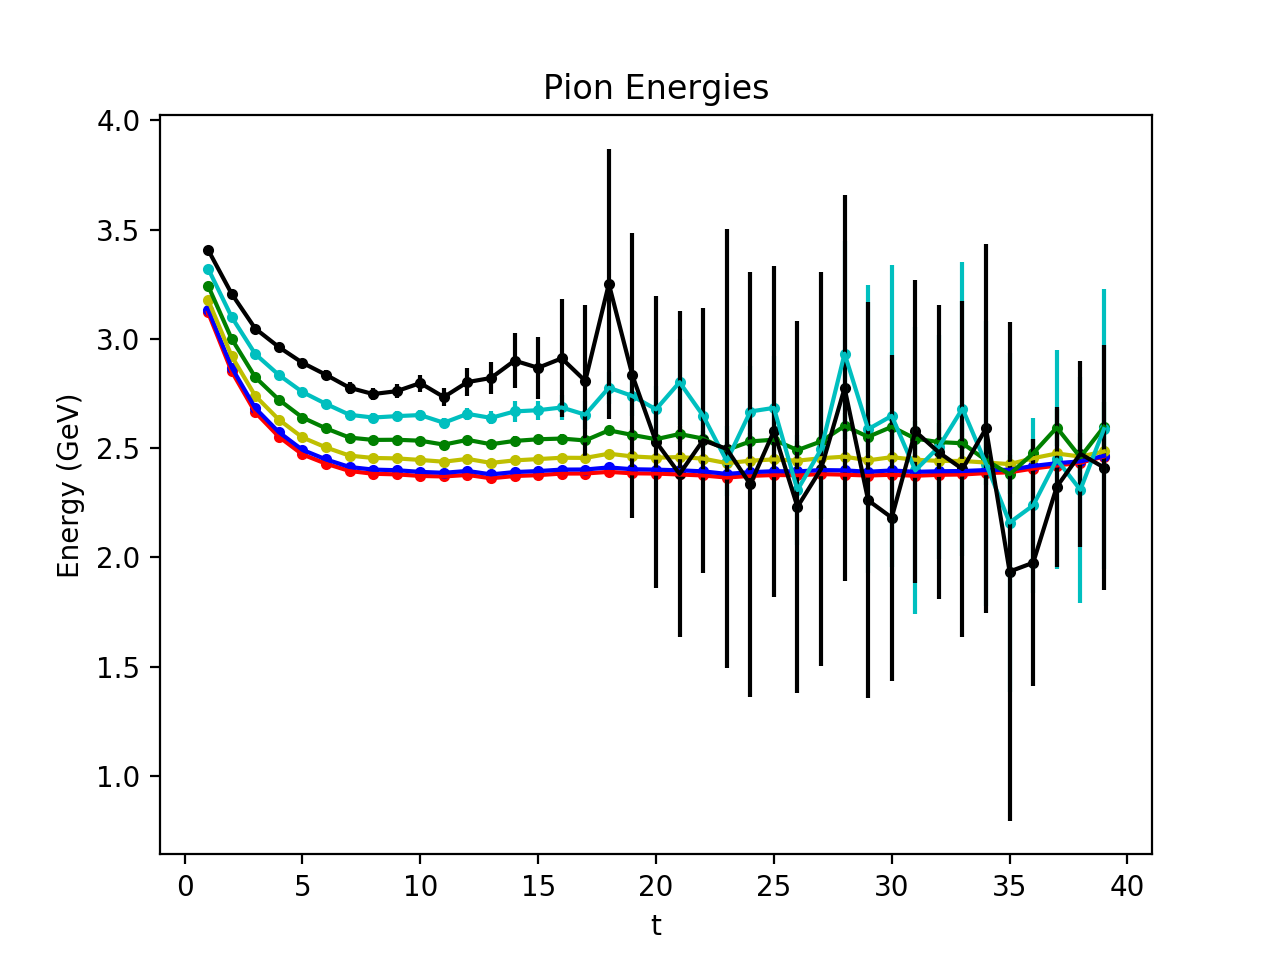

In [32]:
time = np.array([x for x in range(1, 40)])
plotted_energies = np.array(plotted_energies)
plotted_err = np.array(plotted_err)
E_units = (plotted_energies / a) * conversion
error_units = (plotted_err / a) * conversion
plt.figure()
for i in range(6):    #Goes up to 6
    to_plot = E_units[i]
    error_plot = error_units[i]
    plt.scatter(time, to_plot[time], c = colors[i], marker = '.')
    plt.errorbar(time, to_plot[time], yerr = error_plot[time], c = colors[i])
plt.title('Pion Energies')
plt.ylabel('Energy (GeV)')
plt.xlabel('t')
plt.show()